In [1]:
!pip install pandas seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
df = pd.read_csv('data/Shark Tank US dataset.csv')

# Data from Kaggle https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset/data

In [4]:
# Function To reduce copy and paste when deleting columns
def del_column(name):
    df.drop(name, axis=1, inplace=True)
    return 1

## Tasks

### Question to answer:
What factors play the biggest role in getting an investment?
Are there somethings that can detirmine whether or not you are getting a deal before the pitch?

### ML Goal:
Make a model that a user can input data about his/her company and predict if they would get an investment or not


In [5]:
df

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,...,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,9-Aug-09,5-Feb-10,1,1,9-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,9-Aug-09,5-Feb-10,1,2,9-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,9-Aug-09,5-Feb-10,1,3,9-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,9-Aug-09,5-Feb-10,1,4,9-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,9-Aug-09,5-Feb-10,1,5,9-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,14,23-Sep-22,19-May-23,21,1270,5-May-23,NoshiFood,Food and Beverage,Food paint,Male,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1270,14,23-Sep-22,19-May-23,22,1271,19-May-23,Tucky,Fashion/Beauty,Turn any shirt into a crop top,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1271,14,23-Sep-22,19-May-23,22,1272,19-May-23,InfluencersInTheWild,Lifestyle/Home,Board game that requires you to act as a socia...,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,14,23-Sep-22,19-May-23,22,1273,19-May-23,Eyewris,Lifestyle/Home,Reading glasses,Male,...,4.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1274 non-null   int64  
 1   Season Start                        1274 non-null   object 
 2   Season End                          1274 non-null   object 
 3   Episode Number                      1274 non-null   int64  
 4   Pitch Number                        1274 non-null   int64  
 5   Original Air Date                   1274 non-null   object 
 6   Startup Name                        1274 non-null   object 
 7   Industry                            1274 non-null   object 
 8   Business Description                1274 non-null   object 
 9   Pitchers Gender                     1267 non-null   object 
 10  Pitchers City                       502 non-null    object 
 11  Pitchers State                      746 non

In [7]:
df.drop(['Season Start', 'Season End'], axis=1, inplace=True)

In [8]:
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'])

/tmp/ipykernel_2379/2705672231.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Original Air Date'] = pd.to_datetime(df['Original Air Date'])


In [9]:
del_column('Startup Name')

1

In [10]:
df['Pitchers City'].nunique()
df['Pitchers Average Age'].unique()

array([nan, 'Middle', 'Young', 'Old'], dtype=object)

In [11]:
del_column(['Pitchers City', 'Pitchers State'])

1

In [12]:
del_column(['Entrepreneur Names', 'Company Website', 'US Viewership'])

1

In [13]:
del_column(['Total Deal Amount', 'Total Deal Equity'])

1

In [14]:
del_column(['Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan'])

1

In [15]:
del_column(['Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity'])

1

In [16]:
del_column('Guest Name')

1

In [17]:
for col in list(df.columns):
    if col[-6:] == 'Amount' and col[0] != 'O':
        del_column(col)
    elif col[-6:] == 'Equity' and col[0] != 'O':
        del_column(col)

In [18]:
df.isnull().sum()

Season Number                 0
Episode Number                0
Pitch Number                  0
Original Air Date             0
Industry                      0
Business Description          0
Pitchers Gender               7
Pitchers Average Age        936
Multiple Entrepreneurs      427
Original Ask Amount           0
Original Offered Equity       0
Valuation Requested           0
Got Deal                      0
Barbara Corcoran Present    376
Mark Cuban Present          373
Lori Greiner Present        373
Robert Herjavec Present     377
Daymond John Present        376
Kevin O Leary Present       376
dtype: int64

In [19]:
df['Industry'].unique()

array(['Health/Wellness', 'Food and Beverage', 'Business Services',
       'Lifestyle/Home', 'Software/Tech', 'Children/Education',
       'Automotive', 'Fashion/Beauty', 'Media/Entertainment',
       'Fitness/Sports/Outdoors', 'Pet Products', 'Electronics',
       'Green/CleanTech', 'Travel', 'Uncertain/Other', 'Liquor/Alcohol'],
      dtype=object)

In [20]:
dummies = pd.get_dummies(df['Industry'], dtype=int)

In [21]:
df = pd.concat([df, dummies], axis=1)

In [22]:
del_column('Industry')

1

In [23]:
business_descript = df['Business Description']
del_column('Business Description')

1

In [24]:
df['Pitchers Gender'] = df['Pitchers Gender'].fillna('Gender Unknown')

In [25]:
df['Pitchers Gender'].unique()

array(['Female', 'Male', 'Mixed Team', 'Gender Unknown'], dtype=object)

In [26]:
dummies = pd.get_dummies(df['Pitchers Gender'], dtype=int)
df = pd.concat([df, dummies], axis=1)
del_column('Pitchers Gender')

1

In [27]:
df['Pitchers Average Age'].unique()

array([nan, 'Middle', 'Young', 'Old'], dtype=object)

In [28]:
df['Pitchers Average Age'] = df['Pitchers Average Age'].fillna('Age Unknown')

In [29]:
dummies = pd.get_dummies(df['Pitchers Average Age'], dtype=int)
df = pd.concat([df, dummies], axis=1)
del_column('Pitchers Average Age')

1

In [30]:
df['Original Air Date'].iloc[0].day

9

In [31]:
df['Year Aired'] = df['Original Air Date'].apply(lambda x: x.year)
df['Month Aired'] = df['Original Air Date'].apply(lambda x: x.month)
df['Day Aired'] = df['Original Air Date'].apply(lambda x: x.day)

In [32]:
df['Year Aired'].iloc[0]

2009

In [33]:
del_column('Original Air Date')

1

In [34]:
df.head()

,Season Number,Episode Number,Pitch Number,Multiple Entrepreneurs,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Barbara Corcoran Present,Mark Cuban Present,...,Gender Unknown,Male,Mixed Team,Age Unknown,Middle,Old,Young,Year Aired,Month Aired,Day Aired
0,1,1,1,0.0,50000,15.0,333333,1,1.0,0.0,...,0,0,0,1,0,0,0,2009,8,9
1,1,1,2,0.0,460000,10.0,4600000,1,1.0,0.0,...,0,1,0,1,0,0,0,2009,8,9
2,1,1,3,0.0,1200000,10.0,12000000,0,1.0,0.0,...,0,1,0,1,0,0,0,2009,8,9
3,1,1,4,0.0,250000,25.0,1000000,0,1.0,0.0,...,0,1,0,1,0,0,0,2009,8,9
4,1,1,5,0.0,1000000,15.0,6666667,0,1.0,0.0,...,0,1,0,1,0,0,0,2009,8,9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season Number             1274 non-null   int64  
 1   Episode Number            1274 non-null   int64  
 2   Pitch Number              1274 non-null   int64  
 3   Multiple Entrepreneurs    847 non-null    float64
 4   Original Ask Amount       1274 non-null   int64  
 5   Original Offered Equity   1274 non-null   float64
 6   Valuation Requested       1274 non-null   int64  
 7   Got Deal                  1274 non-null   int64  
 8   Barbara Corcoran Present  898 non-null    float64
 9   Mark Cuban Present        901 non-null    float64
 10  Lori Greiner Present      901 non-null    float64
 11  Robert Herjavec Present   897 non-null    float64
 12  Daymond John Present      898 non-null    float64
 13  Kevin O Leary Present     898 non-null    float64
 14  Automoti

In [36]:
df.isnull().sum()

Season Number                 0
Episode Number                0
Pitch Number                  0
Multiple Entrepreneurs      427
Original Ask Amount           0
Original Offered Equity       0
Valuation Requested           0
Got Deal                      0
Barbara Corcoran Present    376
Mark Cuban Present          373
Lori Greiner Present        373
Robert Herjavec Present     377
Daymond John Present        376
Kevin O Leary Present       376
Automotive                    0
Business Services             0
Children/Education            0
Electronics                   0
Fashion/Beauty                0
Fitness/Sports/Outdoors       0
Food and Beverage             0
Green/CleanTech               0
Health/Wellness               0
Lifestyle/Home                0
Liquor/Alcohol                0
Media/Entertainment           0
Pet Products                  0
Software/Tech                 0
Travel                        0
Uncertain/Other               0
Female                        0
Gender U

In [37]:
df['Multiple Entrepreneurs'] = df['Multiple Entrepreneurs'].fillna(0)

In [38]:
df['Multiple Entrepreneurs'] = df['Multiple Entrepreneurs'].astype('int64')

In [39]:
df['Original Offered Equity'] = df['Original Offered Equity'].astype('int64')

In [40]:
lst_of_people_cols = ['Kevin O Leary Present', 'Daymond John Present', 'Robert Herjavec Present', 'Lori Greiner Present', 'Mark Cuban Present', 'Barbara Corcoran Present']

In [41]:
def convert_dtype(cols):
    for col in cols:
        df[col] = df[col].astype('int64')
    return 1

In [42]:
for col in lst_of_people_cols:
    df[col] = df[col].fillna(0)
convert_dtype(lst_of_people_cols)

1

In [43]:
correlation_values = dict(df.corr()['Got Deal'])

In [44]:
correlation_df = pd.DataFrame.from_dict(correlation_values, orient='index', columns=['Correlation'])

In [45]:
correlation_df['Absolute Value'] = np.abs(correlation_df['Correlation'])

In [46]:
correlation_df.sort_values(by='Absolute Value', ascending=False)

,Correlation,Absolute Value
Got Deal,1.000000,1.000000
Season Number,0.167132,0.167132
Pitch Number,0.165280,0.165280
Age Unknown,-0.163489,0.163489
Year Aired,0.160557,0.160557
Middle,0.142438,0.142438
Daymond John Present,-0.117831,0.117831
Robert Herjavec Present,-0.116553,0.116553
Kevin O Leary Present,-0.113470,0.113470
Original Offered Equity,-0.104334,0.104334


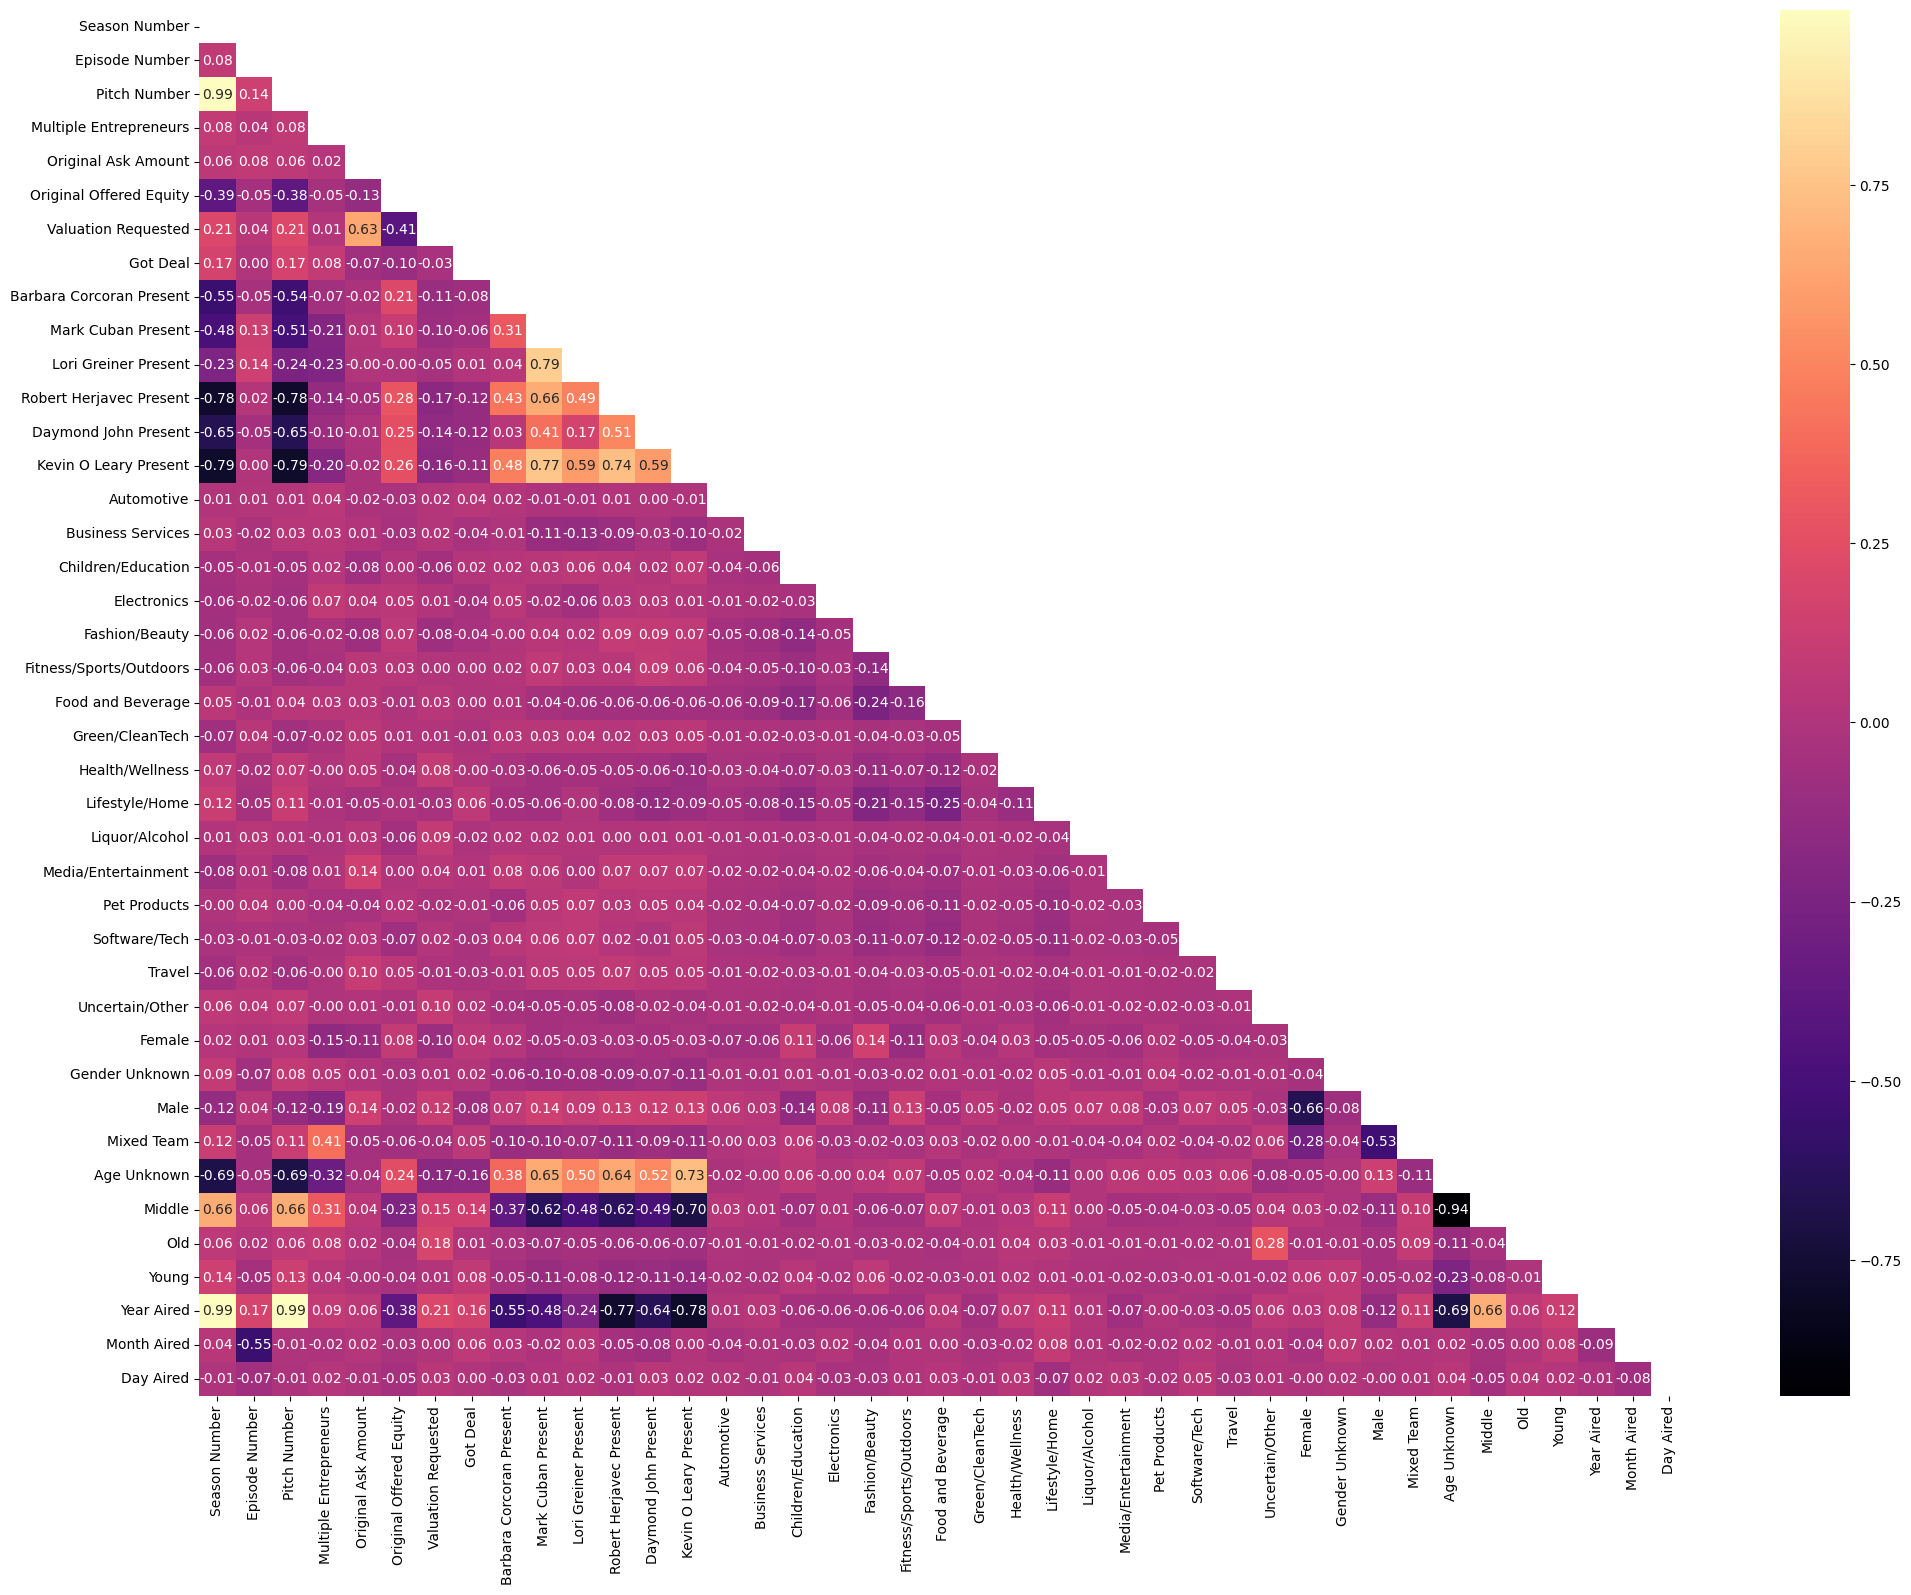

In [47]:
plt.figure(figsize=(24,18), dpi=100)
mask = np.triu(np.ones_like(df.corr(), dtype=int))
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=mask, cmap='magma')
plt.savefig('corr_heatmap.png')

### Question Answered:
#### The biggest Factors in getting a deal according to the data corrilation are:

1. The Season Number
2. Pitch Number
3. The Age
4. The Year the pitch was made
5. Which sharks were in the episode

In [48]:
X = df.drop('Got Deal', axis=1)
y = df['Got Deal']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


## Model Creation

### Simple Model
##### This will be a simple model that doesn't do branching or any special layers

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

2024-01-10 03:46:18.129521: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 03:46:18.157036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 03:46:18.157075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 03:46:18.157100: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 03:46:18.162052: I tensorflow/core/platform/cpu_feature_g

In [ ]:
model = Sequential()

model.add(layers.Dense(41, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [51]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3)

In [52]:
model.fit(X_train,y_train, epochs=50, callbacks=[early_stop], validation_data=(X_val,y_val))

Epoch 1/50


2024-01-10 03:46:20.699324: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f75e406fb90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-10 03:46:20.699344: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-01-10 03:46:20.702488: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-10 03:46:20.712202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-01-10 03:46:20.770295: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 [==============================] - 2s 5ms/step - loss: 0.6817 - accuracy: 0.5853 - val_loss: 0.6774 - val_accuracy: 0.6101
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5948 - val_loss: 0.6721 - val_accuracy: 0.5975
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6188 - val_loss: 0.6676 - val_accuracy: 0.6164
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6377 - val_loss: 0.6655 - val_accuracy: 0.6289
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6178 - val_loss: 0.6613 - val_accuracy: 0.6289
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6419 - val_loss: 0.6572 - val_accuracy: 0.6289
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6377 - val_loss: 0.6588 - val_accuracy: 0.6352
Epoch 8/50
30/30 [=============

In [53]:
test_pred = model.predict(X_test)

5/5 [==============================] - 0s 902us/step


In [54]:
predicted_classes = (test_pred > 0.5).astype(int)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.49      0.29      0.36        63
           1       0.63      0.80      0.71        97

    accuracy                           0.60       160
   macro avg       0.56      0.54      0.53       160
weighted avg       0.58      0.60      0.57       160



In [55]:
print(confusion_matrix(y_test, predicted_classes))

[[18 45]
 [19 78]]


### Complex Model
##### Using the keras function API to build a more complex model to hopefully get a better score

In [56]:
import tensorflow as tf
import tensorflow.keras as keras

In [57]:
X.head()

,Season Number,Episode Number,Pitch Number,Multiple Entrepreneurs,Original Ask Amount,Original Offered Equity,Valuation Requested,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,...,Gender Unknown,Male,Mixed Team,Age Unknown,Middle,Old,Young,Year Aired,Month Aired,Day Aired
0,1,1,1,0,50000,15,333333,1,0,0,...,0,0,0,1,0,0,0,2009,8,9
1,1,1,2,0,460000,10,4600000,1,0,0,...,0,1,0,1,0,0,0,2009,8,9
2,1,1,3,0,1200000,10,12000000,1,0,0,...,0,1,0,1,0,0,0,2009,8,9
3,1,1,4,0,250000,25,1000000,1,0,0,...,0,1,0,1,0,0,0,2009,8,9
4,1,1,5,0,1000000,15,6666667,1,0,0,...,0,1,0,1,0,0,0,2009,8,9


In [58]:
correlation_df.sort_values('Absolute Value', ascending=False)

,Correlation,Absolute Value
Got Deal,1.000000,1.000000
Season Number,0.167132,0.167132
Pitch Number,0.165280,0.165280
Age Unknown,-0.163489,0.163489
Year Aired,0.160557,0.160557
Middle,0.142438,0.142438
Daymond John Present,-0.117831,0.117831
Robert Herjavec Present,-0.116553,0.116553
Kevin O Leary Present,-0.113470,0.113470
Original Offered Equity,-0.104334,0.104334


##### Input groups will be
1. Episode Info(Season Num, Pitch Num, Episode Num) and Date(Year, Month, Day)
2. Sharks Present
3. Personal Info(Age, Gender)
4. Other

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=100)

In [60]:
X1_train = X_train[['Season Number', 'Episode Number', 'Pitch Number', 'Year Aired', 'Month Aired', 'Day Aired']]
X1_test = X_test[['Season Number', 'Episode Number', 'Pitch Number', 'Year Aired', 'Month Aired', 'Day Aired']]
X1_val = X_val[['Season Number', 'Episode Number', 'Pitch Number', 'Year Aired', 'Month Aired', 'Day Aired']]

X2_train = X_train[['Daymond John Present', 'Robert Herjavec Present', 'Kevin O Leary Present', 'Barbara Corcoran Present', 'Mark Cuban Present']]
X2_test = X_test[['Daymond John Present', 'Robert Herjavec Present', 'Kevin O Leary Present', 'Barbara Corcoran Present', 'Mark Cuban Present']]
X2_val = X_val[['Daymond John Present', 'Robert Herjavec Present', 'Kevin O Leary Present', 'Barbara Corcoran Present', 'Mark Cuban Present']]


X3_train = X_train[['Middle', 'Age Unknown', 'Male', 'Young', 'Mixed Team', 'Female', 'Old']]
X3_test = X_test[['Middle', 'Age Unknown', 'Male', 'Young', 'Mixed Team', 'Female', 'Old']]
X3_val = X_val[['Middle', 'Age Unknown', 'Male', 'Young', 'Mixed Team', 'Female', 'Old']]

columns_X1 = ['Season Number', 'Episode Number', 'Pitch Number', 'Year Aired', 'Month Aired', 'Day Aired']
columns_X2 = ['Daymond John Present', 'Robert Herjavec Present', 'Kevin O Leary Present', 'Barbara Corcoran Present', 'Mark Cuban Present']
columns_X3 = ['Middle', 'Age Unknown', 'Male', 'Young', 'Mixed Team', 'Female', 'Old']
all_columns = X.columns.tolist()

columns_X4 = [col for col in all_columns if col not in columns_X1 + columns_X2 + columns_X3]

X4_train = X_train[columns_X4]
X4_test = X_test[columns_X4]
X4_val = X_val[columns_X4]

In [61]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X1_val = scaler.transform(X1_val)

X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)
X2_val = scaler.transform(X2_val)

X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)
X3_val = scaler.transform(X3_val)

X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)
X4_val = scaler.transform(X4_val)

In [62]:
input_shape_X1 = X1_train.shape[1]
input_shape_X2 = X2_train.shape[1]
input_shape_X3 = X3_train.shape[1]
input_shape_X4 = X4_train.shape[1]


#### Building Model Layers

In [63]:
# Input Layers
input_X1 = layers.Input(shape=(input_shape_X1,))
input_X2 = layers.Input(shape=(input_shape_X2,))
input_X3 = layers.Input(shape=(input_shape_X3,))
input_X4 = layers.Input(shape=(input_shape_X4,))

# X1 Branch
dense_1_X1 = layers.Dense(6, activation='relu')(input_X1)
dense_2_X1 = layers.Dense(64, activation='relu')(dense_1_X1)

# X2 Branch
dense_1_X2 = layers.Dense(5, activation='relu')(input_X2)
dense_2_X2 = layers.Dense(64, activation='relu')(dense_1_X2)

# X3 Branch
dense_1_X3 = layers.Dense(7, activation='relu')(input_X3)
dense_2_X3 = layers.Dense(64, activation='relu')(dense_1_X3)

# X4 Branch
reshape_X4 = layers.Reshape((input_shape_X4, 1))(input_X4)
conv1d_1_X4 = layers.Conv1D(filters=64, kernel_size=2, activation='relu')(reshape_X4)
avg_pool_1_X4 = layers.AveragePooling1D(pool_size=2)(conv1d_1_X4)
flatten_X4 = layers.Flatten()(avg_pool_1_X4)
dense_2_X4 = layers.Dense(64, activation='relu')(flatten_X4)

# Merged layer
merged = layers.concatenate([dense_2_X1, dense_2_X2, dense_2_X3, dense_2_X4], axis=1)

merged_layer = layers.Dense(128, activation='relu')(merged)

# Output layer
output = layers.Dense(1, activation='sigmoid')(merged_layer)

model = keras.models.Model(inputs=[input_X1, input_X2, input_X3, input_X4], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 22)]                 0         []                            
                                                                                                  
 reshape (Reshape)           (None, 22, 1)                0         ['input_4[0][0]']             
                                                                                                  
 conv1d (Conv1D)             (None, 21, 64)               192       ['reshape[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                              

In [65]:
model.fit([X1_train, X2_train, X3_train, X4_train], y_train, epochs=50,
          validation_data=([X1_val, X2_val, X3_val, X4_val], y_val),
         callbacks=[early_stop])

Epoch 1/50
30/30 [==============================] - 2s 12ms/step - loss: 0.6681 - accuracy: 0.5958 - val_loss: 0.6637 - val_accuracy: 0.6164
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6209 - val_loss: 0.6613 - val_accuracy: 0.5849
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6346 - val_loss: 0.6730 - val_accuracy: 0.6226
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6366 - val_loss: 0.6683 - val_accuracy: 0.6038
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6471 - val_loss: 0.6731 - val_accuracy: 0.6038
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6335 - val_loss: 0.6756 - val_accuracy: 0.6101


# Conclusion

I belive that the reason this model does not work well even when making it more complex is because there likely are no patterns which can made between data that is known before the pitch/episode that can lead to a deal. 